# PROCESO DE ANÁLISIS EXPLORATORIO DE DATOS APLICADO AL REGISTRO DE ACCIDENTES VIALES DE LA PROVINCIA DE BUENOS AIRES

## CARGA DE LIBRERIAS Y DATASET...

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
# CARGA DE DATOS...
hechos_homicidios = pd.read_parquet("dataset_limpio/hechos_homicidios.parquet")
victimas_homicidios = pd.read_parquet("dataset_limpio/victimas_homicidios.parquet")
hechos_lesiones = pd.read_parquet("dataset_limpio/hechos_lesiones.parquet")
victimas_lesiones = pd.read_parquet("dataset_limpio/victimas_lesiones.parquet")

## PROCESO DE ANÁLISIS EXPLORATORIO DE DATOS...

### 1 - hechos_homicidios

In [138]:
hechos_homicidios.head(5)

,ID,NUMERO_DE_VICTIMAS,AÑO,MES,DIA,FRANJA_HORARIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-5.847534e+09,-3.468757e+09,MOTO,AUTO
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-5.850878e+09,-3.466978e+09,AUTO,PASAJEROS
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,-5.839040e+09,-3.463189e+09,MOTO,AUTO
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-5.846504e+09,-3.468093e+09,MOTO,AUTO
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-5.838718e+09,-3.462247e+09,MOTO,PASAJEROS


In [139]:
# ANÁLISIS DE LA COLUMNA "NUMERO_DE_VICTIMAS"...

# Obtén los valores únicos en la columna "NUMERO_DE_VICTIMAS"
valores_unicos = hechos_homicidios['NUMERO_DE_VICTIMAS'].unique()

# Calcula el porcentaje de cada valor único con respecto al total de la columna
porcentajes = (hechos_homicidios['NUMERO_DE_VICTIMAS'].value_counts() / len(hechos_homicidios['NUMERO_DE_VICTIMAS'])) * 100

# Imprime los valores únicos y sus porcentajes
for valor, porcentaje in zip(valores_unicos, porcentajes):
    print(f"Valor: {valor}, Porcentaje: {porcentaje:.2f}%")

Valor: 1, Porcentaje: 97.22%
Valor: 2, Porcentaje: 2.63%
Valor: 3, Porcentaje: 0.15%


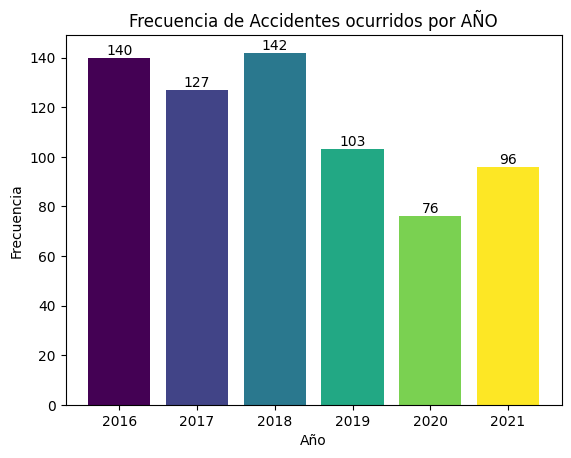

In [140]:
# ANÁLISIS DE LAS COLUMNAS DEL TIEMPO...

# Cuenta la frecuencia de cada valor único en la columna "AÑO"
frecuencia_año = hechos_homicidios['AÑO'].value_counts()

# Ordena los valores por el índice (en este caso, el año)
frecuencia_año = frecuencia_año.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_año)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia_año.index, frecuencia_año.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes ocurridos por AÑO')

# Muestra el gráfico
plt.show()

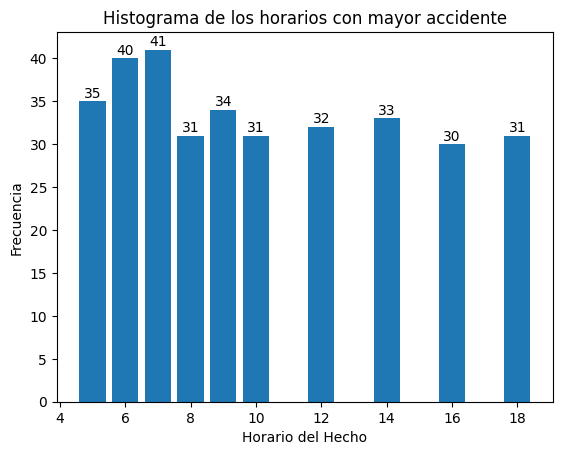

In [141]:
# ANÁLISIS DE LA COLUMNA HORARIO_DEL_HECHO...

# Calcular la frecuencia de los 10 primeros valores únicos en 'HORARIO_DEL_HECHO'
frecuencias = hechos_homicidios['FRANJA_HORARIA'].value_counts().head(10)

# Crear un histograma con los valores del eje y en la cima de cada barra
plt.bar(frecuencias.index, frecuencias.values)

# Mostrar los valores del eje y en la cima de cada barra
for index, value in zip(frecuencias.index, frecuencias.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel('Horario del Hecho')
plt.ylabel('Frecuencia')
plt.title('Histograma de los horarios con mayor accidente')

# Mostrar el histograma
plt.show()

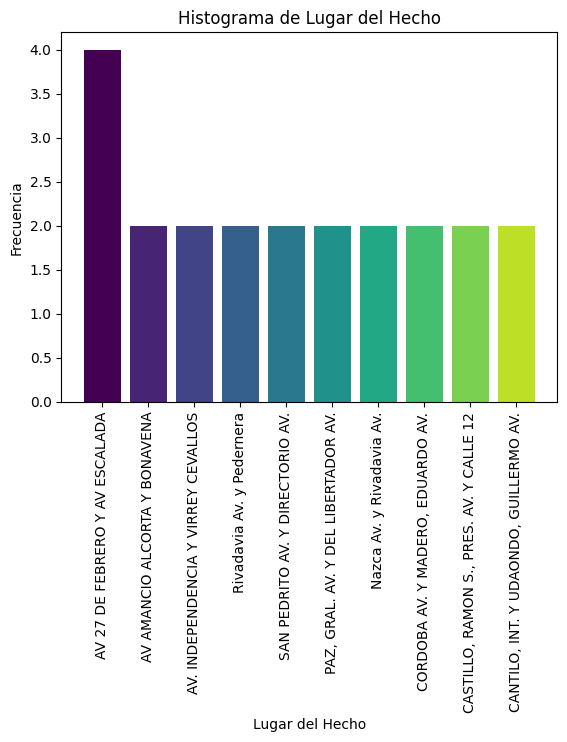

In [142]:
# ANÁLISIS DE LA COLUMNA LUGAR_DEL_HECHO...

# Calcular la frecuencia de los valores en 'LUGAR_DEL_HECHO'
frecuencias = hechos_homicidios['LUGAR_DEL_HECHO'].value_counts()

# Obtener los N valores más comunes (por ejemplo, los 10 más comunes)
N = 10
frecuencias_top = frecuencias.head(N)

# Generar colores aleatorios en formato hexadecimal para cada barra
colores = [plt.cm.viridis(i/len(frecuencias_top)) for i in range(len(frecuencias_top))]

# Crear un histograma con colores diferentes para cada barra
plt.bar(frecuencias_top.index, frecuencias_top.values, color=colores)

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Etiquetas y título
plt.xlabel('Lugar del Hecho')
plt.ylabel('Frecuencia')
plt.title('Histograma de Lugar del Hecho')

# Mostrar el histograma
plt.show()

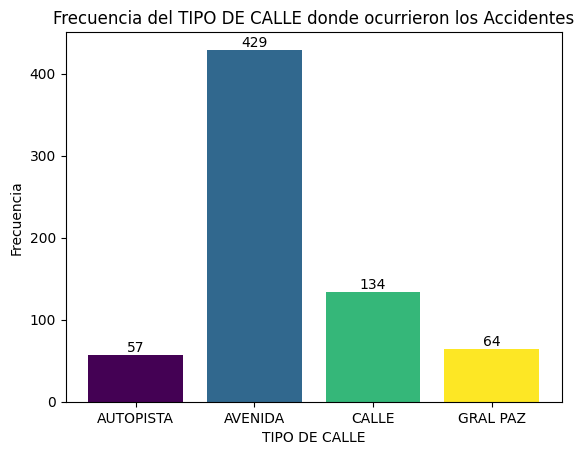

In [143]:
# ANÁLISIS DE LA COLUMNA TIPO_DE_CALLE...

# Cuenta la frecuencia de cada valor único en la columna "TIPO_DE_CALLE"
frecuencia_TIPO_DE_CALLE = hechos_homicidios['TIPO_DE_CALLE'].value_counts()

# Ordena los valores por el índice (en este caso, el año)
frecuencia_TIPO_DE_CALLE = frecuencia_TIPO_DE_CALLE.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_TIPO_DE_CALLE)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia_TIPO_DE_CALLE.index, frecuencia_TIPO_DE_CALLE.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('TIPO DE CALLE')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del TIPO DE CALLE donde ocurrieron los Accidentes')

# Muestra el gráfico
plt.show()

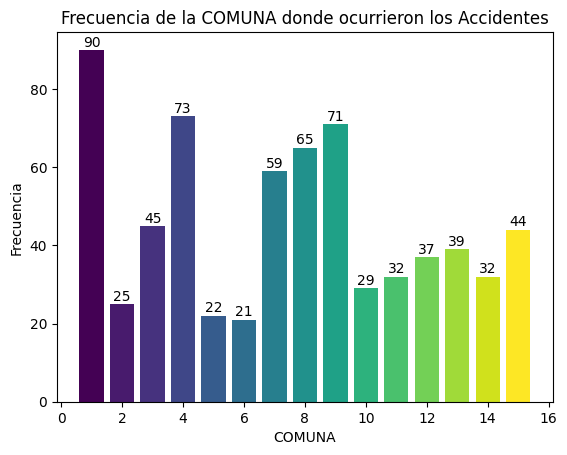

In [144]:
# ANÁLISIS DE LA COLUMNA COMUNA...

# Cuenta la frecuencia de cada valor único en la columna "COMUNA"
frecuencia_COMUNA = hechos_homicidios['COMUNA'].value_counts()

# Ordena los valores por el índice (en este caso, el año)
frecuencia_COMUNA = frecuencia_COMUNA.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_COMUNA)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia_COMUNA.index, frecuencia_COMUNA.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('COMUNA')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la COMUNA donde ocurrieron los Accidentes')

# Muestra el gráfico
plt.show()

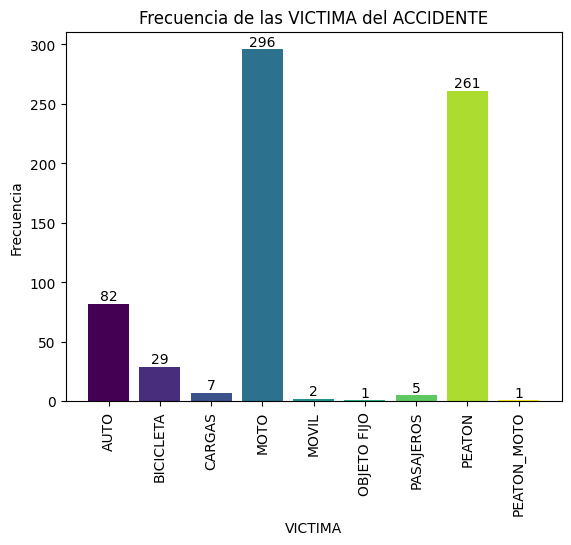

In [145]:
# ANÁLISIS DE LA COLUMNA VICTIMA...

# Cuenta la frecuencia de cada valor único en la columna "VICTIMA"
frecuencia_VICTIMA = hechos_homicidios['VICTIMA'].value_counts()

# Ordena los valores por el índice
frecuencia_VICTIMA = frecuencia_VICTIMA.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_VICTIMA)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia_VICTIMA.index, frecuencia_VICTIMA.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('VICTIMA')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las VICTIMA del ACCIDENTE')

# Muestra el gráfico
plt.show()

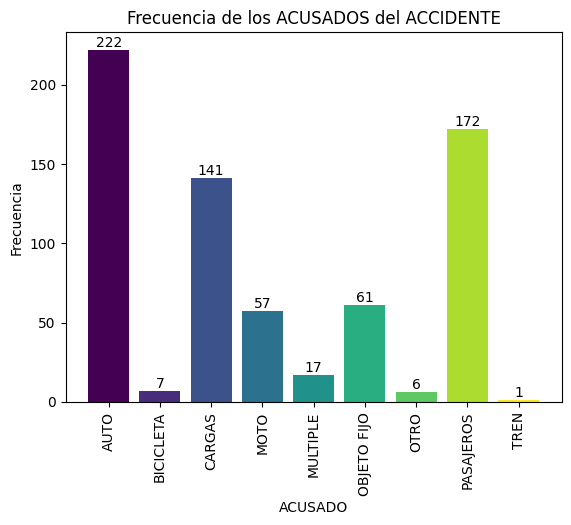

In [146]:
# ANÁLISIS DE LA COLUMNA ACUSADO...

# Cuenta la frecuencia de cada valor único en la columna "ACUSADO"
frecuencia_ACUSADO = hechos_homicidios['ACUSADO'].value_counts()

# Ordena los valores por el índice
frecuencia_ACUSADO = frecuencia_ACUSADO.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_ACUSADO)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia_ACUSADO.index, frecuencia_ACUSADO.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('ACUSADO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los ACUSADOS del ACCIDENTE')

# Muestra el gráfico
plt.show()

### CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS AL DATAFRAME hechos_homicidios...

El resultado del EDA aplicado al presente dataframe arroja los siguientes valores (se tiene en cuenta que en estos casos hay fallecimientos):

* Número de victimas ocurridos por accidente: UNA (01) persona.
* Año con mayor cantidad de accidentes: AÑO DOS MIL DIESCIOCHO (2018).
* Horario con mayor cantidad de accidentes: En el horario de la NOCHE (00:00).
* Lugares con mayor cantidad de accidentes SEGÚN EL TIPO DE CALLE: AVENIDA.
* Calle con mayor accidentes: Av Gral PAZ.
* Lugares con mayor cantidad de accidentes SEGÚN LA COMUNA: COMUNA 01.
* VICTIMAS CON MAYOR CANTIDAD DE ACCIDENTES (VEHICULO): MOTO.
* CULPABLES CON MAYOR CANTIDAD DE ACCIDENTES (VEHICULO): AUTO.

### 2 - victimas_homicidios

In [147]:
victimas_homicidios.head(5)

,ID_VICTIMAS,AÑO,MES,DIA,ROL,VEHICULO_DE_VICTIMA,SEXO,EDAD,AÑO_FALLECIMIENTO,MES_FALLECIMIENTO,DÍA_FALLECIMIENTO
0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1
1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016,1,2
2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016,1,3
3,2016-0004,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,2017,2,26
4,2016-0005,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016,2,1


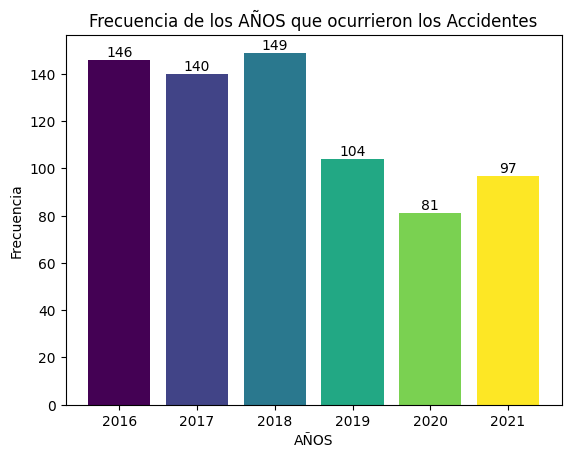

In [148]:
# ANÁLISIS DE LA COLUMNA AÑO...

# Cuenta la frecuencia de cada valor único en la columna "victimas_homicidios"
frecuencia = victimas_homicidios['AÑO'].value_counts()

# Ordena los valores por el índice (en este caso, el año)
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('AÑOS')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los AÑOS que ocurrieron los Accidentes')

# Muestra el gráfico
plt.show()

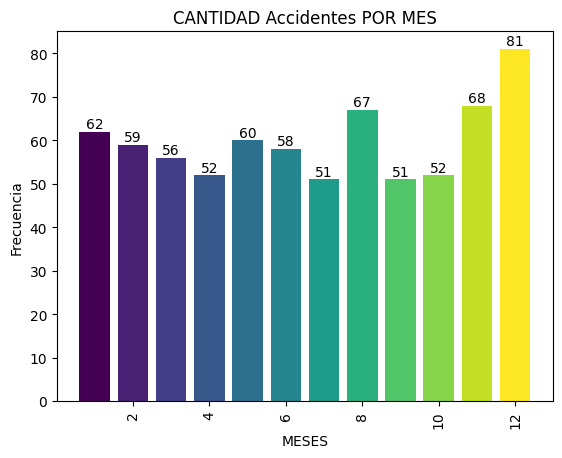

In [149]:
# ANÁLISIS DE LA COLUMNA MES...

# Cuenta la frecuencia de cada valor único en la columna "victimas_homicidios"
frecuencia = victimas_homicidios['MES'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('MESES')
plt.ylabel('Frecuencia')
plt.title('CANTIDAD Accidentes POR MES')

# Muestra el gráfico
plt.show()

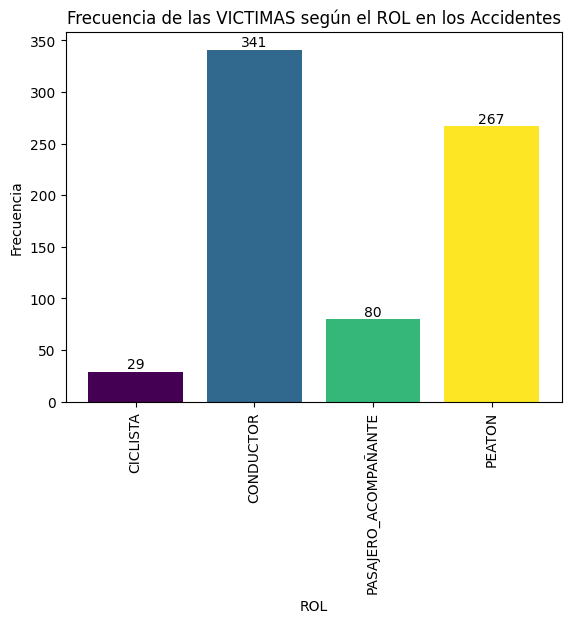

In [150]:
# ANÁLISIS DE LA COLUMNA VICTIMA...

# Cuenta la frecuencia de cada valor único en la columna "VICTIMA"
frecuencia = victimas_homicidios['ROL'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('ROL')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las VICTIMAS según el ROL en los Accidentes')

# Muestra el gráfico
plt.show()

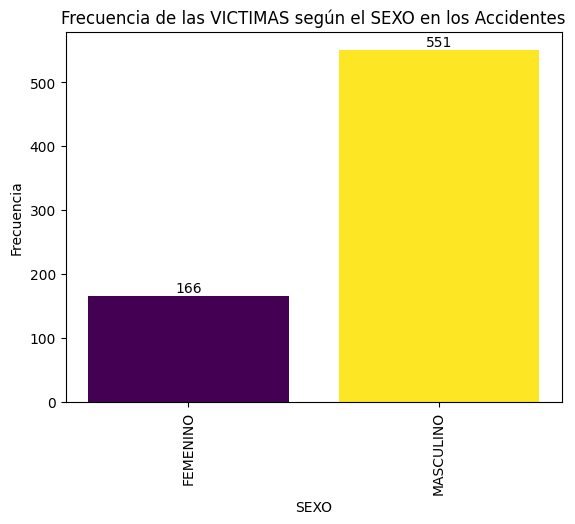

In [151]:
# ANÁLISIS DE LA COLUMNA SEXO...

# Cuenta la frecuencia de cada valor único en la columna "SEXO"
frecuencia = victimas_homicidios['SEXO'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las VICTIMAS según el SEXO en los Accidentes')

# Muestra el gráfico
plt.show()

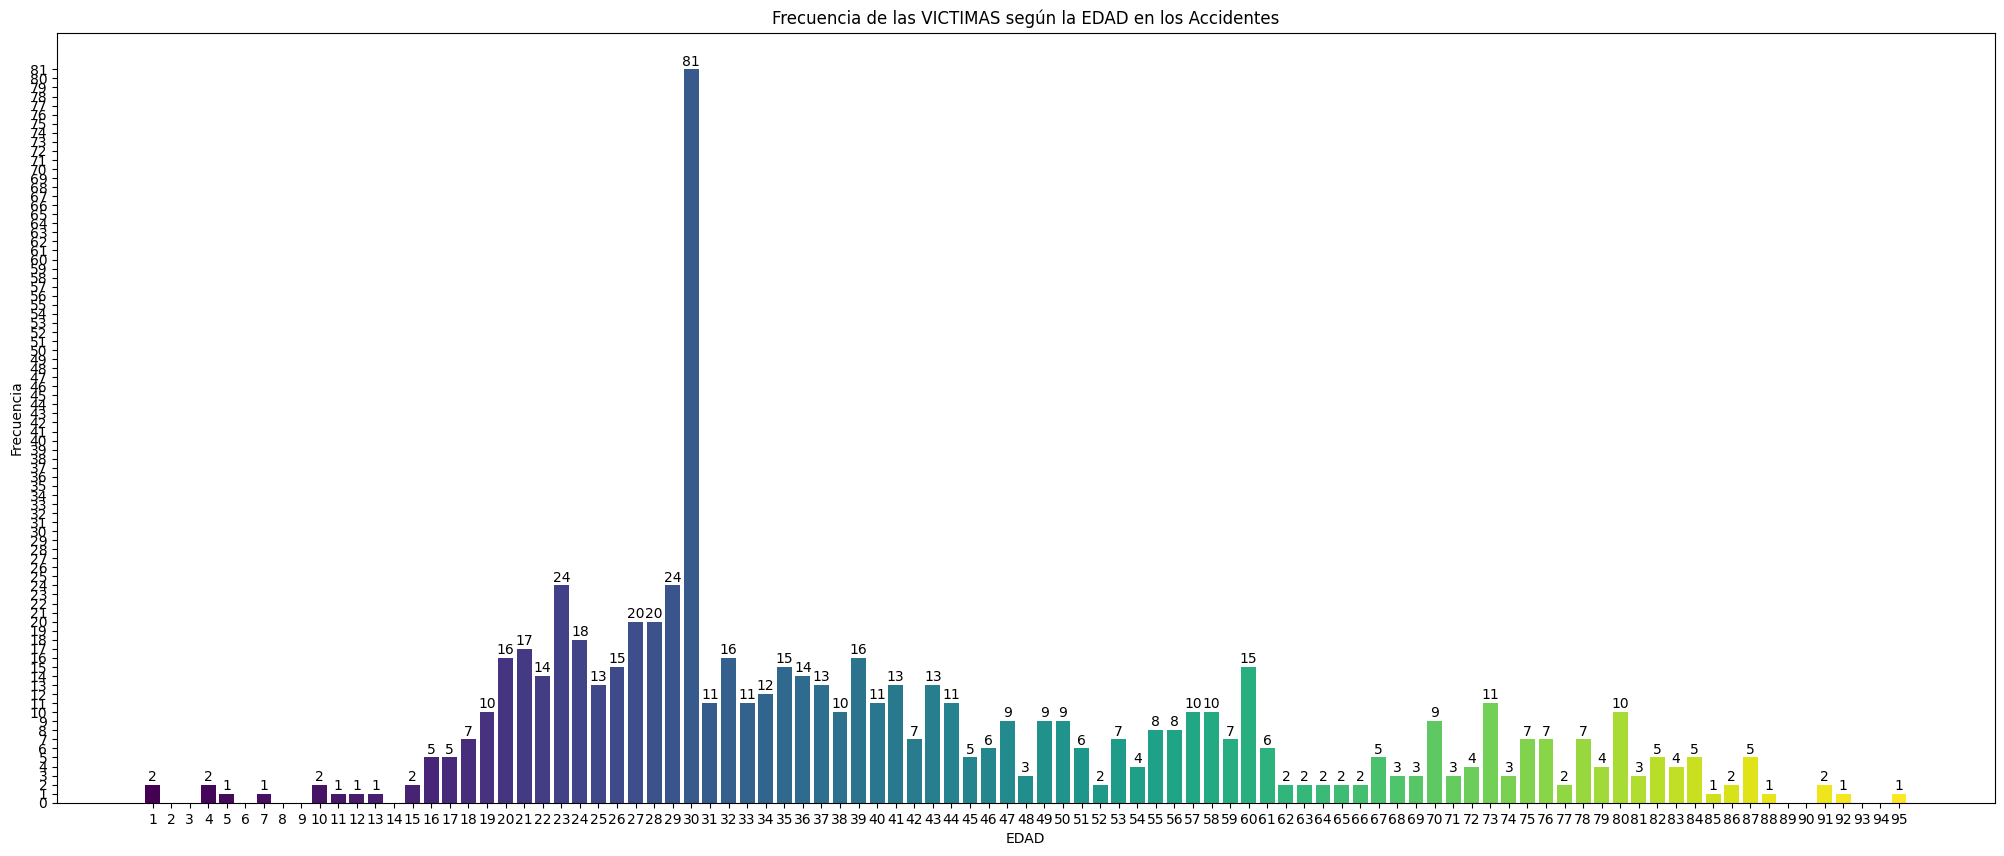

In [152]:
# ANÁLISIS DE LA COLUMNA EDAD...

# Cuenta la frecuencia de cada valor único en la columna "EDAD"
frecuencia = victimas_homicidios['EDAD'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Ajusta el tamaño de la figura
plt.figure(figsize=(25, 10))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Ajusta los intervalos en el eje x e y
plt.xticks(np.arange(min(frecuencia.index), max(frecuencia.index)+1, 1))
plt.yticks(np.arange(0, max(frecuencia.values)+1, 1))

# Añade etiquetas y título
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las VICTIMAS según la EDAD en los Accidentes')

# Muestra el gráfico
plt.show()

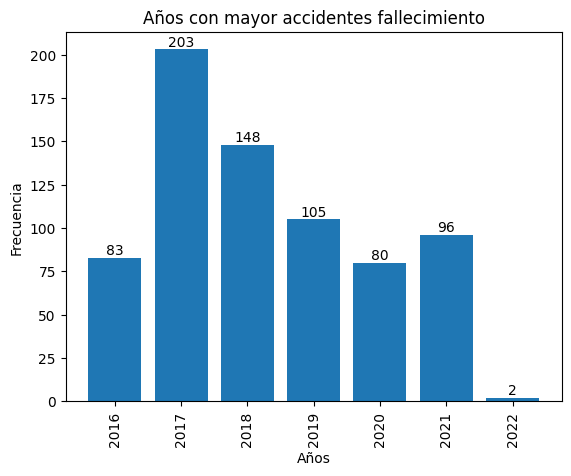

In [153]:
# ANÁLISIS DE LA COLUMNA FECHA_FALLECIMIENTO...

# Calcular la frecuencia de los 10 primeros valores únicos en 'FECHA_FALLECIMIENTO'
frecuencias = victimas_homicidios['AÑO_FALLECIMIENTO'].value_counts().head(10)

# Crear un histograma con los valores del eje y en la cima de cada barra
plt.bar(frecuencias.index, frecuencias.values)

# Mostrar los valores del eje y en la cima de cada barra
for index, value in zip(frecuencias.index, frecuencias.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.title('Años con mayor accidentes fallecimiento')

# Mostrar el histograma
plt.show()

### CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS AL DATAFRAME victimas_homicidios...

El resultado del EDA aplicado al presente dataframe arroja los siguientes valores (se tiene en cuenta que en estos casos hay fallecimientos):

* Año con mayor cantidad de accidentes: AÑO DOS MIL DIESCIOCHO (2018).
* La mayoría de las victimas tenian el rol de CONDUCTOR.
* El vehículo con mayor cantidad de accidentes apunta a la MOTO.
* El personal con mayor cantidad de accidentes era del SEXO MASCULINO.
* La edad de las víctimas gira en torno de los 29 y 30 años.
* El periodo de tiempo de los fallecimientos rondan en el mes de diciembre - enero.

### 3 - victimas_homicidios

In [154]:
victimas_lesiones.head(5)

,ID_HECHO,AÑO,MES,DIA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,MOTO,VARON,57,GRAVE
1,LC-2019-0000063,2019,1,1,MOTO,VARON,29,GRAVE
2,LC-2019-0000079,2019,1,1,MOTO,VARON,29,GRAVE
3,LC-2019-0000082,2019,1,1,MOTO,VARON,45,GRAVE
4,LC-2019-0000082,2019,1,1,MOTO,MUJER,45,GRAVE


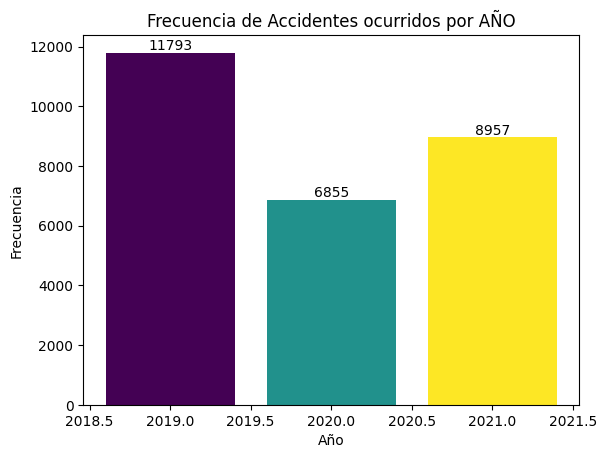

In [155]:
# ANÁLISIS DE LA COLUMNA AÑO...

# Cuenta la frecuencia de cada valor único en la columna "AÑO"
frecuencia = victimas_lesiones['AÑO'].value_counts()

# Ordena los valores por el índice (en este caso, el año)
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes ocurridos por AÑO')

# Muestra el gráfico
plt.show()

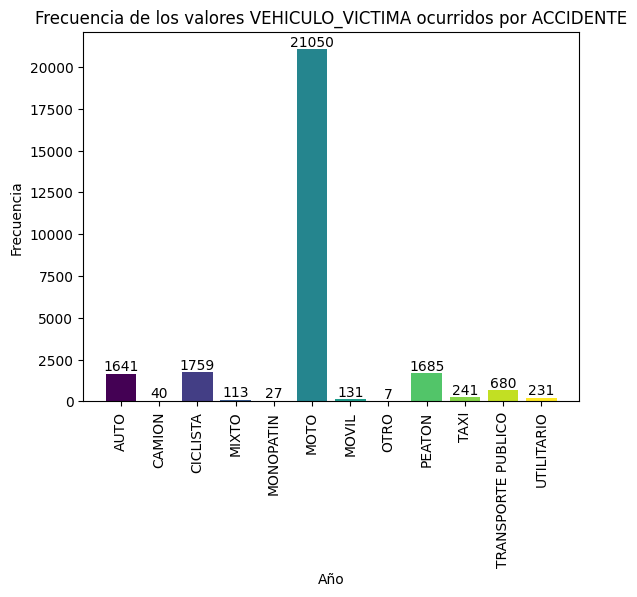

In [156]:
# ANÁLISIS DE LA COLUMNA VEHICULO_VICTIMA...

# Cuenta la frecuencia de cada valor único en la columna "VEHICULO_VICTIMA"
frecuencia = victimas_lesiones['VEHICULO_VICTIMA'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los valores VEHICULO_VICTIMA ocurridos por ACCIDENTE')

# Muestra el gráfico
plt.show()

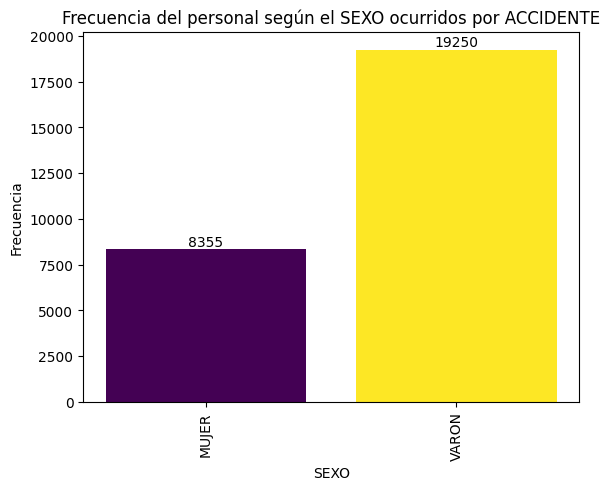

In [157]:
# ANÁLISIS DE LA COLUMNA SEXO...

# Cuenta la frecuencia de cada valor único en la columna "SEXO"
frecuencia = victimas_lesiones['SEXO'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('SEXO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del personal según el SEXO ocurridos por ACCIDENTE')

# Muestra el gráfico
plt.show()

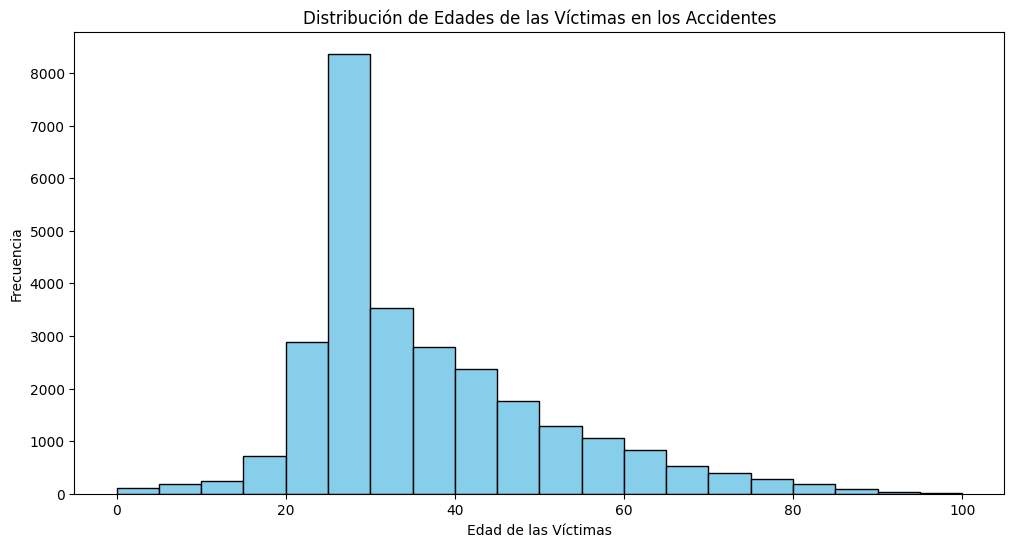

In [158]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea el histograma
plt.hist(victimas_lesiones['EDAD_VICTIMA'], bins=20, color='skyblue', edgecolor='black')

# Añade etiquetas y título
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de las Víctimas en los Accidentes')

# Muestra el histograma
plt.show()

In [159]:
# Calcular el porcentaje de valores únicos que se repiten en la columna 'EDAD_VICTIMA'
porcentaje_repeticion = victimas_lesiones['EDAD_VICTIMA'].value_counts(normalize=True) * 100

# Crear un DataFrame con los valores y porcentajes
resultado = pd.DataFrame({'EDAD_VICTIMA': porcentaje_repeticion.index, 'Porcentaje': porcentaje_repeticion.values})

# Ordenar el DataFrame por el porcentaje en orden descendente
resultado = resultado.sort_values(by='Porcentaje', ascending=False)

# Seleccionar los primeros 10 registros
resultado_porcentaje = resultado.head(10)

In [160]:
resultado_porcentaje

,EDAD_VICTIMA,Porcentaje
0,29,19.112480
1,28,2.941496
2,27,2.811085
3,30,2.771237
4,26,2.756747
5,25,2.687919
6,31,2.640826
7,32,2.561130
8,23,2.543018
9,24,2.506792


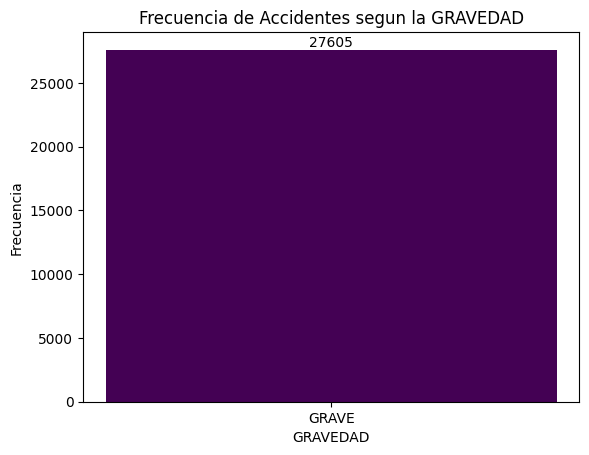

In [161]:
# ANÁLISIS DE LA COLUMNA GRAVEDAD...

# Cuenta la frecuencia de cada valor único en la columna "GRAVEDAD"
frecuencia = victimas_lesiones['GRAVEDAD'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('GRAVEDAD')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes segun la GRAVEDAD')

# Muestra el gráfico
plt.show()

### CONCLUSIONES DEL ANÁLISIS EXPLORATORIO DE DATOS AL DATAFRAME victimas_lesiones...

El resultado del EDA aplicado al presente dataframe arroja los siguientes valores (se tiene en cuenta que en estos casos hay fallecimientos):

* Año con mayor cantidad de accidentes: AÑO DOS MIL DIESCINUEVE (2019).
* El vehículo con mayor cantidad de accidentes apunta a la MOTO.
* El personal con mayor cantidad de accidentes eran VARONES.
* La edad de las víctimas gira en torno de los 25 y 32 años.
* La mayoría de los accidentes registrados fueron GRAVES.

### 4 - hechos_lesiones

In [162]:
hechos_lesiones.head(5)

,ID,NUMERO_DE_VICTIMAS,AÑO,MES,DIA,FRANJA_HORARIA,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD,VEHICULO_SINIESTRO
0,LC-2019-0000179,1,2019,1,1,9,14,-58.408911,-34.559658,CICLISTA,AUTO,GRAVE,ciclista
1,LC-2019-0000053,1,2019,1,1,1,8,-58.443510,-34.669125,AUTO,AUTO,GRAVE,auto
2,LC-2019-0000063,1,2019,1,1,2,8,-58.468335,-34.677556,MOTO,AUTO,GRAVE,auto
3,LC-2019-0000079,1,2019,1,1,2,7,-58.437425,-34.647349,PEATON,AUTO,GRAVE,moto
4,LC-2019-0000082,4,2019,1,1,4,3,-58.398225,-34.604579,AUTO,AUTO,GRAVE,transporte_publico


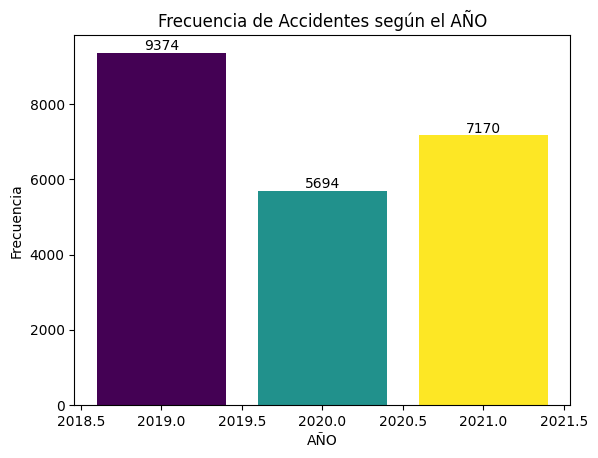

In [163]:
# ANÁLISIS DE LA COLUMNA AÑO...

# Cuenta la frecuencia de cada valor único en la columna "AÑO"
frecuencia = hechos_lesiones['AÑO'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('AÑO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes según el AÑO')

# Muestra el gráfico
plt.show()

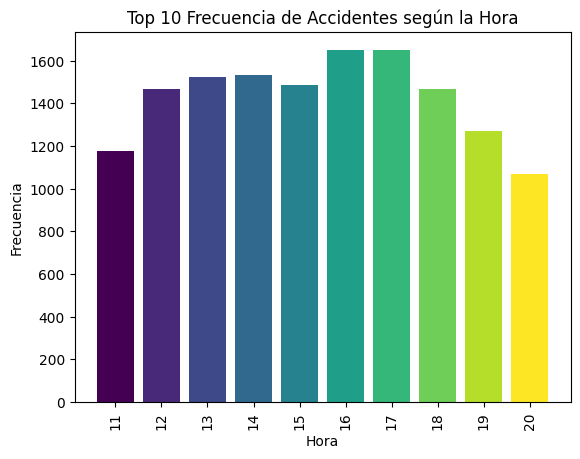

In [164]:
# ANÁLISIS DE LA COLUMNA HORA...

# Cuenta la frecuencia de cada valor único en la columna "HORA"
frecuencia = hechos_lesiones['FRANJA_HORARIA'].value_counts()

# Selecciona los 10 valores con mayor frecuencia
frecuencia_top_10 = frecuencia.head(10)

# Ordena los valores por el índice
frecuencia_top_10 = frecuencia_top_10.sort_index()

# Crea el gráfico de barras con colores y etiquetas
fig, ax = plt.subplots()
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia_top_10)))
ax.bar(frecuencia_top_10.index.astype(str), frecuencia_top_10.values, color=colores, label='Frecuencia')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
ax.set_xlabel('Hora')
ax.set_ylabel('Frecuencia')
ax.set_title('Top 10 Frecuencia de Accidentes según la Hora')

# Muestra el gráfico
plt.show()

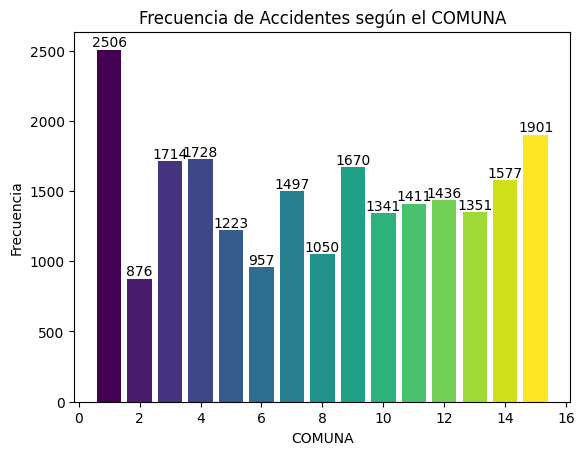

In [165]:
# ANÁLISIS DE LA COLUMNA COMUNA...

# Cuenta la frecuencia de cada valor único en la columna "COMUNA"
frecuencia = hechos_lesiones['COMUNA'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('COMUNA')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes según el COMUNA')

# Muestra el gráfico
plt.show()

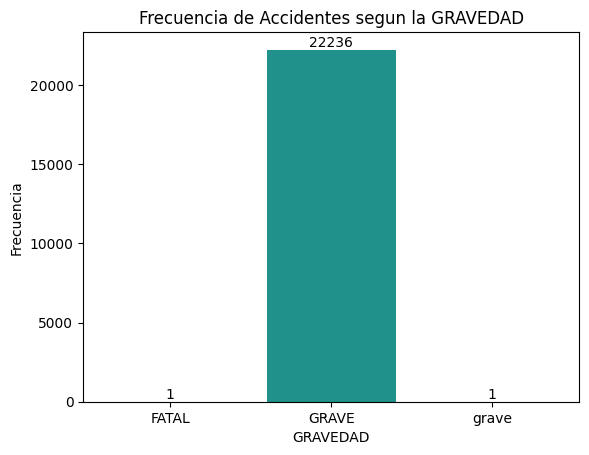

In [166]:
# ANÁLISIS DE LA COLUMNA GRAVEDAD...

# Cuenta la frecuencia de cada valor único en la columna "GRAVEDAD"
frecuencia = hechos_lesiones['GRAVEDAD'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Añade etiquetas y título
plt.xlabel('GRAVEDAD')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes segun la GRAVEDAD')

# Muestra el gráfico
plt.show()

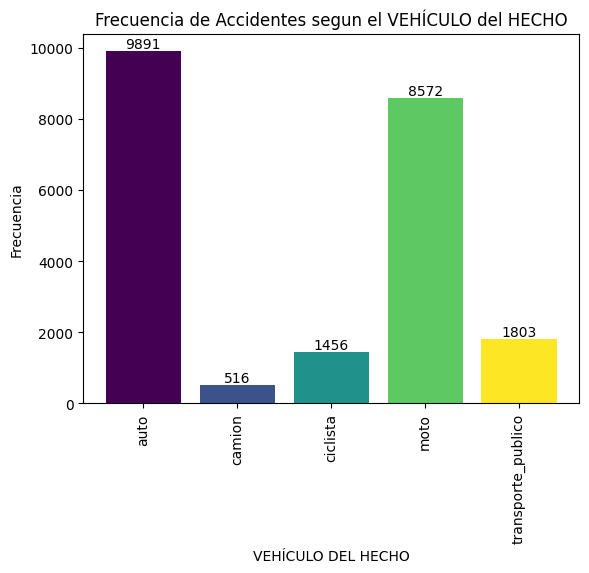

In [167]:
# ANÁLISIS DE LA COLUMNA VEHÍCULO_HECHO...

# Cuenta la frecuencia de cada valor único en la columna "VEHÍCULO_HECHO"
frecuencia = hechos_lesiones['VEHICULO_SINIESTRO'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('VEHÍCULO DEL HECHO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes segun el VEHÍCULO del HECHO')

# Muestra el gráfico
plt.show()

### CONCLUSIONES PARCIALES DEL ANÁLISIS EXPLORATORIO DE DATOS AL DATAFRAME...

El resultado del EDA aplicado al presente dataframe arroja los siguientes valores (se tiene en cuenta que en estos casos hay fallecimientos):

* Año con mayor cantidad de accidentes: AÑO DOS MIL DIESCINUEVE (2019).
* El vehículo con mayor cantidad de accidentes apunta a la MOTO.
* El horario con mayor accidentes ocurrieron al mediodia.
* Los accidentes ocurrienron en la COMUNA 01.
* La mayoría de los accidentes registrados fueron GRAVES.

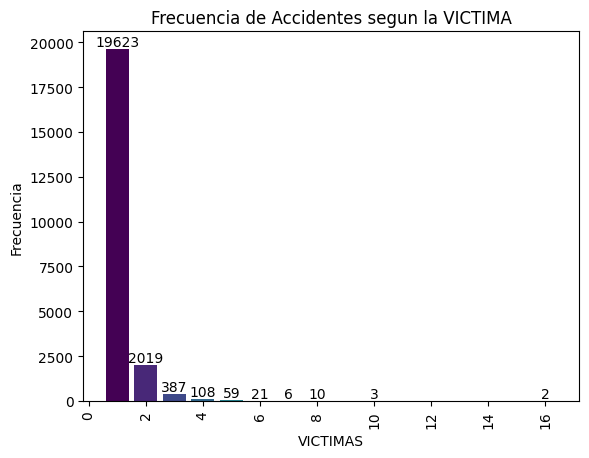

In [170]:
# ANÁLISIS DE LA COLUMNA VICTIMA...

# Cuenta la frecuencia de cada valor único en la columna "VICTIMA"
frecuencia = hechos_lesiones['NUMERO_DE_VICTIMAS'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('VICTIMAS')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes segun la VICTIMA')

# Muestra el gráfico
plt.show()

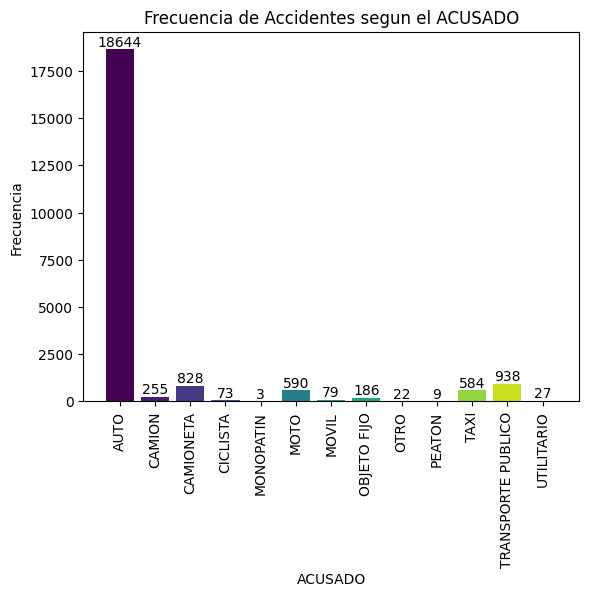

In [172]:
# ANÁLISIS DE LA ACUSADO acusado...

# Cuenta la frecuencia de cada valor único en la columna "ACUSADO"
frecuencia = hechos_lesiones['ACUSADO'].value_counts()

# Ordena los valores por el índice
frecuencia = frecuencia.sort_index()

# Genera una paleta de colores única
colores = plt.cm.viridis(np.linspace(0, 1, len(frecuencia)))

# Crea el gráfico de barras con colores y etiquetas en la cima de las barras
for i, (valor_x, valor_y) in enumerate(zip(frecuencia.index, frecuencia.values)):
    plt.bar(valor_x, valor_y, color=colores[i], label=str(valor_y))
    plt.text(valor_x, valor_y + 0.1, str(valor_y), ha='center', va='bottom')

# Rotar las etiquetas del eje x en forma vertical
plt.xticks(rotation='vertical')

# Añade etiquetas y título
plt.xlabel('ACUSADO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Accidentes segun el ACUSADO')

# Muestra el gráfico
plt.show()

### CONCLUSIONES PARCIALES DEL ANÁLISIS EXPLORATORIO DE DATOS AL DATAFRAME...

El resultado del EDA aplicado al presente dataframe arroja los siguientes valores (se tiene en cuenta que en estos casos hay fallecimientos):

* Las VICTIMAS tuvieron una mayor frecuencia de accidentes con el vehículo "MOTO".
* Los ACUSADOS tuvieron una mayor frecuencia de accidentes con el vehículo "AUTO".